# ISAE FOTSU321 : Imagerie radar
# BE 1 - 13/11/2018

## LE MOULEC Gauthier

<span style="color:blue"> Instructions générales : </span> 
 * complétez votre nom et prénom dans la cellule ci-dessus
 
 
 * Durée du BE : 2h. A l'issue des 2h, vous me déposez votre travail sur le LMS (ET, pour plus de sécurité, cous me l'envoyez également par mail à alejandro.bohe@cnes.fr). Je ferai une première notation sur ce travail en temps limité. Puis vous avez jusqu'à lundi soir prochain pour terminer votre travail et je complèterai aevc une seconde notation.
 
 
 * Vous pouvez répondre aux questions qui ne nécessitent pas de code soit directement dans le notebook en convertissant les cellules prévues à cet effet en "Markdown" et en y tapant votre réponse, soit sur une feuille manuscrite que vous n'oublierez pas de me remettre à la fin des 2h (puis de m'envoyer au cours de la semaine lorsque vous aurez terminé). N'hésitez pas à créer des cellules supplémentaires si vous en avez besoin.
 
 
 * Faites attention aux variables "globales", qui sont définies pour tout le notebook ! Si vous en utilisez, donnez leur des noms spécifiques (e.g. si vous définissez H=658 dans l'exercice 2 puis H=900 dans l'exercice 3, la première définition est caduque. Attention donc à l'ordre de vos évaluations. Autant que possible, encapsulez vos variables dans des fonctions (variables locales). Je veux pouvoir executer votre notebook dans l'ordre depuis le début et reproduire vous outputs (ce que vous pouvez vérifier vous-mêmes en faisant Kernel "Restart & Clear Output" puis en réévaluant toutes les cellules dans l'ordre.
 
 
 * Toutes les antennes seront considérées pour simplifier comme "idéales" : leur gain dans les deux directions est considéré comme nul en dehors du cône dont l'ouverture est donné par le rapport de la longueur d'onde et de la taille de l'antenne et constant à l'intérieur de ce cône (même approximation que celle utilisée en cours)
 
 
 * On se placera pour simplifier dans l'approximation Terre plate et orbite rectiligne (comme dans le cours) : on néglige la rotondité de la Terre et la courbure de l'orbite. Ceci est valide pour l'intégralité du BE (sauf évidemment pour la question bonus de l'exercice 2). 
 
 
  * Dans tout ce BE, on utilisera les packages et les constantes ci-dessous. Veillez donc à évaluer la cellule ci-dessous ainsi que la suivante (qui modifie simplement l'aspect des plots).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import pylab

c = 299792458. # m/s

In [3]:
pylab.rc('font', family='serif', size=16)

## <span style="color:red"> Exercice 1 : cours</span>

<span style="color:blue">Question 1 :</span> énoncez deux raisons pour lesquelles il est intéressant de construire des radars imageurs dans des bandes de fréquences différentes (bande P, L, X, Ku, Ka...)

Il y a d abord un argument technique; en effet, le choix de la longueur d onde canalise ce qu on souhaite observer (plus la longueur
d onde est petite plus on observe de details)
Autre argument: cote pratique; on peut s autoriser la taille d antenne en changeant de gamme de frequence  

<span style="color:blue">Question 2 :</span> un radar imageur vole à $v=7400$ m/s à une altitude de $H=900$ km. La longueur de l'antenne (dans le sens de l'orbite) est $L=5$ m et sa largeur est $W=1$ m. La fréquence centrale du signal émis est $f_c=35.75$ GHz (bande Ka) et la largeur de bande du chirp vaut $B_{\rm chirp}=200$ MHz. La durée d'émission du chirp est $\tau = 15 \mu s$. L'écho retour est échantilloné à la fréquence $f_s=300$ MHz et la fréquence d'émission des pulses est $PRF=4420$ Hz. L'axe de l'antenne est dans le plan perpendiculaire à la trajectoire et forme un angle $\theta=3°$ avec la verticale. Toutes les notations/conventions sont les mêmes que dans le cours.

 <span style="color:blue">2a :</span> quelle est la résolution en range et en azimuth d'un tel instrument ?

In [6]:
#c = 3.00*10**8
Bchirp = 2.00*10**8
L = 5
v = 7400

resoRange = c/(2*Bchirp)
print( "Rrg = ", resoRange)

resoAz = L/2
print("Raz = ", resoAz)

Rrg =  0.749481145
Raz =  2.5


<span style="color:blue">2b :</span> le signal est-il bien échantilloné au sens de Shannon (dans les deux dimensions...) ?  Justifiez votre réponse.

In [7]:
Bdop = 2*v/L
print("Bdop = ", Bdop)

Bdop =  2960.0


La PRF est effectivement superieure a Bdop; ce qui constitue le critere de Shannon en azimuth! 
De meme: fs > Bchirp! On remplit donc le critere de Shannon en range

<span style="color:blue">2c : </span>Quel intérêt y a-t-il à augmenter la PRF ? Donnez par ailleurs deux raisons pour lesquelles on ne peut pas augmenter cette PRF indéfiniment.

Augmenter la PRF permet d augmenter le nombre de pulses alloues dans l observation d une zone; le gain de la compression azimuth. 
De plus, on facilite le respect du critere de Shannon.
Cependant, on ne peut pas l augmenter indefiniment car elle cree une ambiguite range.

<span style="color:blue">Question 3 : </span>expliquez en une ou deux phrases le phénomène de layover qui affecte les images radar

Le layover est un phenomene d ombre. Il agit sur les images RADAR de relief principalement. 
Ce phenomene se caracterise par un deplacement de l image en relief observee en direction du RADAR. Elle est ainsi vue décalée.

## <span style="color:red"> Exercice 2</span>

Cet exercice traite des ambiguités en range que nous avons discutées à l'occasion du cours 3 et de la façon dont on choisit la fauchée et la PRF pour les supprimer. On rappelle qu'on se place pour simplifier dans l'approximation Terre plate et orbite rectiligne. On considèrera un radar imageur volant à une altitude constante $H=658$ km.

<span style="color:blue">Question 1 : </span>Rappelez en une phrase ce que sont les ambiguités range.

Concretement il s agit du chevauchement de deux signaux emis a des instants differents; 
chevauchement qui existe du fait du decalage range entre les deux endroits observes. 
Naturellement, elle est conditionnee par la PRF.

<span style="color:blue">Question 2a : </span> On considère (uniquement pour cette question 2, a et b) un radar imageur de $PRF = 1500$ Hz et une cible située à un angle $\theta=30°$. Calculez le rang d'ambiguité $k$ de l'écho retour.

In [8]:
H = 658000
theta = 30*np.pi/180
PRF = 1500

R = H/np.cos(theta)
k = (2*R/c)*PRF
print("k = ", k)

k =  7.603189479705465


<span style="color:blue">Question 2b : </span> Calculez également le rang d'ambiguité $k'$ de l'écho nadir. Expliquez pourquoi on s'intéresse à l'écho nadir alors que l'antenne pointe à $30°$.

In [11]:
kPrime = (2*H/c)*PRF
print("kPrime = ",kPrime)

kPrime =  6.584555239211522


On calcule aussi des parametres de l echo NADIR pour eviter qu il rentre en conflit avec l echo du swath par ses lobes secondaires
qui sont plus intenses car plus proches.

On souhaite à présent construire le diagramme "en diamant" que nous avons vu en cours. Le résultat (que vous devez donc reproduire) est ci-dessous. Je vous en rappelle le principe : on représente dans le plan $(PRF,\theta)$ les bandes interdites. En bleu, celles pour lesquelles l'écho retour d'une cible située à l'angle $\theta$ arrive pendant l'émission d'un pulse ultérieur. En vert, celles pour lesquelles l'écho retour d'une cible située à l'angle $\theta$ arrive pendant un écho nadir. Notons $t=0$ le temps d'émission du début du premier pulse du radar et $\tau$ la durée de l'impulsion. On utilisera pour les applications numériques $\tau = 30 \mu s$.

![title](diamond_plot.png)

<span style="color:blue">Question 3a : </span> Considérons une cible vue avec un angle $\theta$ et intéressons nous à l'instant d'arrivée de l'écho retour du premier pulse. Pour une valeur de PRF donnée, quelles conditions doit satisfaire le temps d'aller-retour $t_{AR}(\theta)$ pour que l'écho retour se superpose à la fenêtre d'émission du pulse $q$ (c'est-à-dire pour être dans la q-ème bande interdite bleue) ? En écrivant $t_{AR}(\theta)$ en fonction de $H$, $\theta$ et $c$, en déduire une borne supérieure et une borne inférieure sur $\theta$ pour appartenir à la q-ème bande interdite bleue.

Pour que l'écho se superpose à la fenêtre d'émission du q-ième pulse, il faut que le temps d'aller-retour soit compris entre le temps de début et le temps de fin du pulse. C'est-à-dire : 
$$ \frac{q}{PRF} - \tau < t_AR(\theta) < \frac{q}{PRF} + \tau $$
Or $t_AR(\theta) = \frac{2R}{c} = \frac{2H}{c.cos(\theta)} $ donc on en déduit : 
$$ arccos(\frac{2.H.PRF}{c(q-\tau.PRF)}) < \theta < arccos(\frac{2.H.PRF}{c(q+\tau.PRF)})$$ 

<span style="color:blue">Question 3b : </span> Pour une valeur de PRF donnée, quelles conditions doit satisfaire le temps d'aller-retour $t_{AR}(\theta)$ pour que l'écho retour se superpose à la réception de l'écho nadir du pulse $q'$ (c'est-à-dire pour être dans la $q'$-ème bande interdite verte) ? En déduire une borne supérieure et une borne inférieure sur $\theta$ pour appartenir à la $q'$-ème bande interdite verte.

Pour que l'écho se superpose à l'écho nadir du q'-ième pulse, il faut que le temps d'aller-retour soit compris entre le temps de début de réception et le temps de fin de réception de l'écho Nadir. C'est-à-dire :
$$ \frac{q'}{PRF} + \frac{2.H}{c} - \tau< t_AR(\theta) < \frac{q'}{PRF} + \tau + \frac{2.H}{c}$$
$$ arccos(\frac{1}{1+\frac{c}{2.H}(\frac{q'}{PRF}-\tau)}) < \theta < arccos(\frac{1}{1+\frac{c}{2.H}(\frac{q'}{PRF}+\tau)})$$ 

<span style="color:blue">Question 4 : </span> Reproduire à présent le plot en diamant. Vous pourrez notamment vous servir de la fonction matplotlib fill_between qui, comme son nom l'indique, remplit la zone entre deux courbes. Vous pourrez vous appuyer sur l'ébauche de code ci-dessous (qui colorie une zone qui n'a évidemment rien à voir!). En particulier, la grille en PRF est déjà définie pour vous.

C:\Users\almal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.
C:\Users\almal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


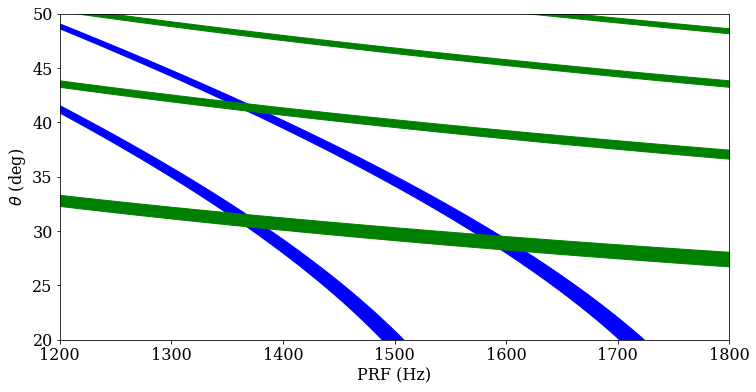

In [14]:
PRF_vals_exo2 = np.linspace(1200, 1800, 100)


def theta_max_example(PRF,q):
    # return 32.+PRF/1500,q
    return np.arccos(1/(c*(q/PRF+tau)/(2*H)))*180/3.14

def theta_min_example(PRF,q):
    #return 31.+PRF/1500
    return np.arccos(1/(c*(q/PRF-tau)/(2*H)))*180/3.14

def theta_max_example_nadir(PRF,qPrime):
    # return 32.+PRF/1500,q
    return np.arccos(1/(1+c*(qPrime/PRF+tau)/(2*H)))*180/3.14

def theta_min_example_nadir(PRF,qPrime):
    #return 31.+PRF/1500
    return np.arccos(1/(1+c*(qPrime/PRF-tau)/(2*H)))*180/3.14

plt.figure(figsize=(12,6))
plt.xlim([1200,1800])
plt.ylim([20,50])
plt.xlabel('PRF (Hz)')
plt.ylabel(r'$\theta$ (deg)')

for q in range(7,9):
    plt.fill_between(PRF_vals_exo2, theta_min_example(PRF_vals_exo2,q), theta_max_example(PRF_vals_exo2,q), color='blue')
    
for qPrime in range(1,5):
    plt.fill_between(PRF_vals_exo2, theta_min_example_nadir(PRF_vals_exo2,qPrime), theta_max_example_nadir(PRF_vals_exo2,qPrime), color='green')
        

Cest bien la courbe trouvee!

<span style="color:blue">Question 5 : </span> Le designer de l'instrument choisit finalement de fixer $PRF = 1425$ Hz. Quelles sont les valeurs minimales et maximales de $\theta$ qui définissent la fauchée autorisée, sachant que l'on souhaite couvir la région autour de $\theta=35°$ ? (dans l'idéal, vous fournirez des valeurs précises à l'aide des fonctions que vous aurez écrites à la question précédente plutôt que des valeurs approximatives tirées d'une simple lecture à l'oeil du plot produit). 

Produire une nouvelle version du diagramme en diamant en y rajoutant une ligne verticale indiquant la PRF choisie et deux lignes horizontales correspondant aux bornes sur $\theta$.

En supposant une antenne idéale (gain nul en dehors du cône d'ouverture déterminé par la longueur d'onde et la taille de l'antenne) fonctionnant en bande X ($\lambda=3$ cm), calculer l'angle idéal de pointage et la largeur d'antenne idéale permettant de maximiser la fauchée.

q =  7.63634482860926
qPrime =  6.255327477250946
8.0
min 38.195281480544615
min2 40.408264857553604
thetaMin =  31.02099843953267 
thetaMax =  38.195281480544615
Comme l'antenne est supposée idéale, l'angle de pointage idéal est la moyenne entre les deux valeurs limites.
Angle de pointage idéal : 34.61 °
Largeur d'antenne idéale : 0.3 m


C:\Users\almal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.
C:\Users\almal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


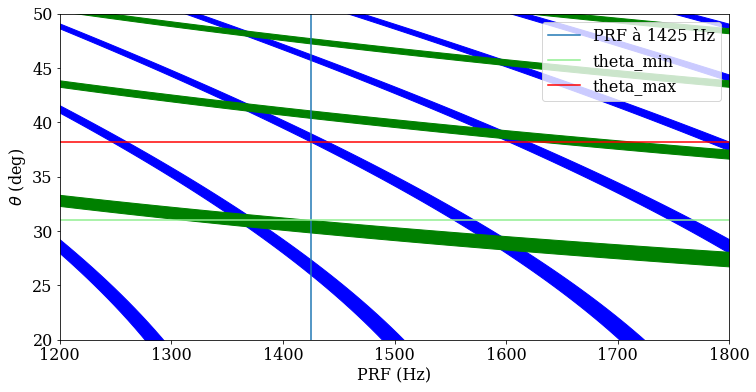

In [15]:
#Paramètres ajustés pour thetaMid = 35 degrés
PRF = 1425
thetaMid = 35
H = 658000
R = H/np.cos(thetaMid*np.pi/180)

#Calcul des rangs d'ambiguité
q = (2*R/c)*PRF
print ("q = ",q)
qPrime = (2*H/c)*PRF
print ("qPrime = ",qPrime)

thetaMax = np.minimum(theta_min_example(PRF,np.floor(q)+1),theta_min_example_nadir(PRF,np.floor(q)-np.floor(qPrime)+1))
thetaMin = np.maximum(theta_max_example(PRF,np.floor(q)),theta_max_example_nadir(PRF,np.floor(q)-np.floor(qPrime)))

print(np.floor(q)+1)
print('min', theta_min_example(PRF,np.floor(q)+1))
print('min2', theta_min_example_nadir(PRF,np.floor(q)-np.floor(qPrime)+1))
print('thetaMin = ', thetaMin, "\nthetaMax = ", thetaMax)

#Graphique diamant
PRF_vals_exo2 = np.linspace(1200, 1800, 100)
plt.figure(figsize=(12,6))
plt.xlim([1200,1800])
plt.ylim([20,50])
plt.xlabel('PRF (Hz)')
plt.ylabel(r'$\theta$ (deg)')

for q in range(1,20):
    plt.fill_between(PRF_vals_exo2, theta_min_example(PRF_vals_exo2,q), theta_max_example(PRF_vals_exo2,q), color='blue')
for qPrime in range (1,5):
    plt.fill_between(PRF_vals_exo2, theta_min_example_nadir(PRF_vals_exo2,qPrime), theta_max_example_nadir(PRF_vals_exo2,qPrime), color='green') 

#Graphe des droites   
plt.plot([1425]*100,np.linspace(20,50,100),label='PRF à 1425 Hz')
plt.plot(PRF_vals_exo2,[thetaMin]*100, color='lightgreen', label='theta_min')
plt.plot(PRF_vals_exo2,[thetaMax]*100, color='red', label='theta_max')
plt.legend()

#paramètres idéaux
laX=3e-2
rMax=H/np.cos(thetaMax)
rMin=H/np.cos(thetaMin)
S=np.sqrt(rMax**2-H**2)-np.sqrt(rMin**2-H**2)
print("Comme l'antenne est supposée idéale, l'angle de pointage idéal est la moyenne entre les deux valeurs limites.")
theta = thetaMin+(thetaMax-thetaMin)/2
print("Angle de pointage idéal :",round(theta,2),"°")
R_0 = H/np.cos(thetaMid)
W = laX*R_0/S/np.cos(thetaMid)
print("Largeur d'antenne idéale :",round(W,2),"m")


<span style="color:blue">Question BONUS [Plus difficile et à ne faire qu'après les 2h...] : </span> Refaire cet exercice en supposant la Terre sphérique de rayon $R_T = 6400 $ km

<span style="color:red">Non abouti </span>

En prenant en compte la rotondité de la Terre, on modifie la définition de R qui n'est plus égal à $\frac{H}{cos(\theta)}$. 
!
Grâce au théorème d'Al-Kashi on obtient : 
$$ R^2 = R_T^2 + (H+R_T)^2 -2.R_T.(H+R_T).cos(\beta) $$
Or, $cos(\beta) = \frac{R_T-x}{R_T}$. Il s'agit donc de déterminer x.  
Par Pythagore on a la relation : 
$$h^2 +(R_T-x)^2 = R_0^2$$ 
Puis grace à la trigonométrie on obtient :
$$ tan(\theta) = \frac{h}{H+x}$$
En remplaçant h dans l'équation précédente, on obtient une équation du second degré :
$$ x^2.(tan^2(\theta) +1) + x.(2.H.tan^2(\theta)-2.R_T) + H^2.tan^2(\theta)$$
D'où $$ x_{1,2} = \frac{2.R_T - 2.H.tan^2(\theta) \pm \sqrt{\Delta}}{2.(tan^2(\theta)+1)} $$
avec $ \Delta = (2.H.tan^2(\theta) - 2R_T)^2 - 4.(tan^2(\theta)+1).H^2.tan^2(\theta) $

ie. $ \Delta =(2.H.tan^2(\theta) - 2.R_T + 2.H.\frac{tan(\theta)}{cos(\theta)}).(2.H.tan^2(\theta) - 2.R_T - 2.H.\frac{tan(\theta)}{cos(\theta)})$

En réinjectant et en "simplifiant": 
$$ R = \sqrt{R_T^2 + (H+R_T)^2 - 2.(H+R_T).(R_T-x)}$$ 
$$ R = \sqrt{R_T^2 + (H+R_T)^2 - 2.(H+R_T).\frac{(R_T+H).tan^2(\theta)-\sqrt{(H.tan^2(\theta)-R_T+H.\frac{tan(\theta)}{cos(\theta)}).(H.tan^2(\theta)-R_T-H.\frac{tan(\theta)}{cos(\theta)})}}{tan^2(\theta)+1}}$$ 

In [17]:
PRF = 1425
H = 658000
R_T = 6400000
theta = 35*np.pi/180
delta = (2*H*np.tan(theta)**2-2*R_T+2*H*np.tan(theta)/np.cos(theta))*(2*H*np.tan(theta)**2-2*R_T-2*H*np.tan(theta)/np.cos(theta))
x1 = (2*R_T-2*H*np.tan(theta)**2+np.sqrt(delta))/(2*(1+np.tan(theta)+1))
x2 = (2*R_T-2*H*np.tan(theta)**2-np.sqrt(delta))/(2*(1+np.tan(theta)+1))
cos_beta1 = (R_T-x1)/R_T
cos_beta2 = (R_T-x2)/R_T
R1 = np.sqrt(R_T**2+(H+R_T)**2-2*R_T*(H+R_T)*cos_beta1)
R2 = np.sqrt(R_T**2+(H+R_T)**2-2*R_T*(H+R_T)*cos_beta2)
print("x1 = ",x1,"m, x2 = ",x2,"m")
print("La valeur de x2 est la seule qui soit cohérente au vu des données")
print("La valeur de x1 correspond à l'intersection de la prolongation de l'angle theta avec la surface de la Terre")
print("R2 = ",R2,"m")

#Calcul d'ambiguïtés
k = 2*R2/c*PRF
print ("Rang de l'ambiguïté k=(2R2/c)*PRF=",k)
k_prime = 2*H/c*PRF
print ("Rang de l'ambiguïté k'=(2H/c)*PRF=",k_prime)

#Redéfinition des theta limites
def theta_max_round(q,PRF):
    return



x1 =  4491763.732875827 m, x2 =  9659.732884288067 m
La valeur de x2 est la seule qui soit cohérente au vu des données
La valeur de x1 correspond à l'intersection de la prolongation de l'angle theta avec la surface de la Terre
R2 =  754533.491234557 m
Rang de l'ambiguïté k=(2R2/c)*PRF= 7.173030517060197
Rang de l'ambiguïté k'=(2H/c)*PRF= 6.255327477250946


## <span style="color:red"> Exercice 3</span>

Dans cet exercice, vous devez implémenter le traitement SAR que nous avons dérit en cours. Le fichier 'image_BE1_raw.nc' contient (au format netCDF4; je vous fournis la fonction permettant de lire les données) contient une image SAR avant processing.

Description des paramètres du radar dont vous avez besoin :
 * vitesse satellite $v=7400$ m/s 
 * altitude $H=900$ km
 * $PRF = 9400$ Hz
 * fréquence d'échantillonnage de l'écho retour $f_s = 200 MHz$
 * fréquence centrale du chirp $f_c=35.75$ GHz
 * bande du chirp $B_{\rm chirp}=200$ MHz
 * durée chirp $\tau = 5.7 \mu s$
 
 
Comme dans les autres exercices et dans le cours, on néglige pour simplifier la rotondité de la Terre et la courbure de l'orbite : on considère donc l'approximation Terre plate et orbite rectiligne (comme dans le cours). On considèrera également l'antenne comme idéale (cf ci-dessus).

Voici d'abord quelques lignes de code définissant une fonction d'importation des données et une fonction de visualisation que vous réutiliserez à plusieurs reprises et qui affiche simplement l'image d'amplitude en échelle de gris. Vous n'avez rien à modifier dans la cellule suivante.

In [18]:
def import_SAR_image():
    slc = np.load('image_BE1_raw_np.npy')
    print('N_a = nb de lignes = nb de pulses : {}'.format(slc.shape[0]))
    print('N_r = nb de colonnes = nb de portes range : {}'.format(slc.shape[1]))
    return slc

# pour une visu plus rapide, utiliser ds_fact = 2 ou 4 si nécessaire
def plot_amp(tab, ds_fact=1):
    plt.figure(figsize=(16,16))
    plt.imshow(np.abs(tab[::ds_fact,::ds_fact]), cmap='gray')

Commençons par effectivement importer les données et stocker l'image dans un tableau numpy complexe. Puis visualisons le contenu de l'image (ou plus exactement son module). Comme d'habitude, le résultat avant traitement n'est pas terrible... Félicitations si vous arrivez à reconnaître la scène à ce stade.

In [19]:
image_raw = import_SAR_image()
N_a, N_r = image_raw.shape

plot_amp(image_raw)

N_a = nb de lignes = nb de pulses : 4096
N_r = nb de colonnes = nb de portes range : 2048


<span style="color:blue">Question 1 : </span>L'instrument a été conçu de façon à ce que la bande Doppler $B_{\rm dop}$ soit égale à la $PRF$. En déduire la longueur $L$ de l'antenne.

In [21]:
PRF=9400
v=7400

# Compute of L
L=2*v/PRF
print("L =",L)

L = 1.574468085106383


<span style="color:blue">Question 2 : </span>Le premier échantillon de chaque écho retour (correspondant donc au premier pixel de chaque ligne) est enregistré un temps $t_0=6.0045 ms$ après l'émission de chaque pulse correspondant. En déduire le range $R_0$ en début de fauchée ainsi que la distance au sol $\rho_0$ entre le début de la fauchée et la trace du satellite.

$R_0$ correspond au range le plus court admis par le choix de PRF (comme dans l'exercice précédent). Par conséquent :
$ 2.R_0 = c.t_0 $ d'où $ R_0 = \frac{c.t_0}{2} = 900 km$
On en déduit par Pythagore $ \rho_0 = \sqrt{R_0^2-H^2} = 9666 m $ 

In [29]:
# variables connues
dt = 6.0045e-3
H = 900000
PRF=9400
v=7400
H = 900000
tau = 5.7e-6
f_c = 35.75e9
B_chirp = 200e6
f_s =200e6

r0 = c*dt/2
rho0 = np.sqrt(r0**2-H**2)
print("r0 = ", r0)
print("rho0 = ", rho0)

r0 =  900051.9070305
rho0 =  9666.19621360275


<span style="color:blue">Question 3 : </span> Vous allez à présent écrire trois fonctions séparées correspondant aux trois étapes du traitement
* compression en range
* migrations de range
* compression en azimuth

Voici quelques fonctions qui pourront vous aider dans votre implémentation (n'hésitez pas à consulter leur documentation):
* np.fft.fft(tab) : fonction de FFT 2D. On peut également ne faire la transformée que dans une seule des deux directions. Par exemple : np.fft.fft(image_raw, axis=0) fait la fft de l'image en azimuth
* np.fft.fftfreq(N,d=dt) : fonction qui donne la grille de fréquences de la FFT pour une série temporelle de longueur N échantillonnée au pas de temps dt. Exemple : np.fft.fftfreq(N_a, d=1/PRF) donne la grille de fréquences de la FFT dans la direction azimuth (i.e. les fréquences Doppler)
* np.tile : permet de construire un tableau 2D en répliquant un tableau 1D. Ex : np.tile(tab_1D, (N,1)) donne un tableau 2D de N lignes, chacune étant égale à tab_1D. Il suffit d'utiliser la transposition pour avoir un tableau dont toutes les colonnes sont identiques à tab_1D...

<span style="color:blue">Question 3a : </span> Commençons par la compression range qui correspond comme nous l'avons vu en cours à une opération de filtrage optimal. Nous avons également vu en cours que le filtrage optimal, comme toute opération de convolution peut s'écrire sous une formulation temporelle ou fréquentielle. Nous allons ici opter pour la seconde [<span style="color:blue">Question bonus </span> : pourquoi est-ce plus efficace ?]. Nous allons de plus utiliser l'expression analytique approchée (issue de la SPA, stationary phase approximation) de la transformée de Fourier du filtre, que nous avons donnée en cours.


A présent, complétez la fonction range_compression ci-dessous. Puis appliquez cette fonction à l'image brute et affichez le résultat à l'aide de plot_amp

Comme on s'intéresse à l'intervalle de fréquence [-f_s/2;f_s/2] et que f_s=B_chirp, la fonction porte W(-B_chirp/2,B_chirp/2) devient simplement l'indicatrice et n'a donc pas besoin d'être codée.


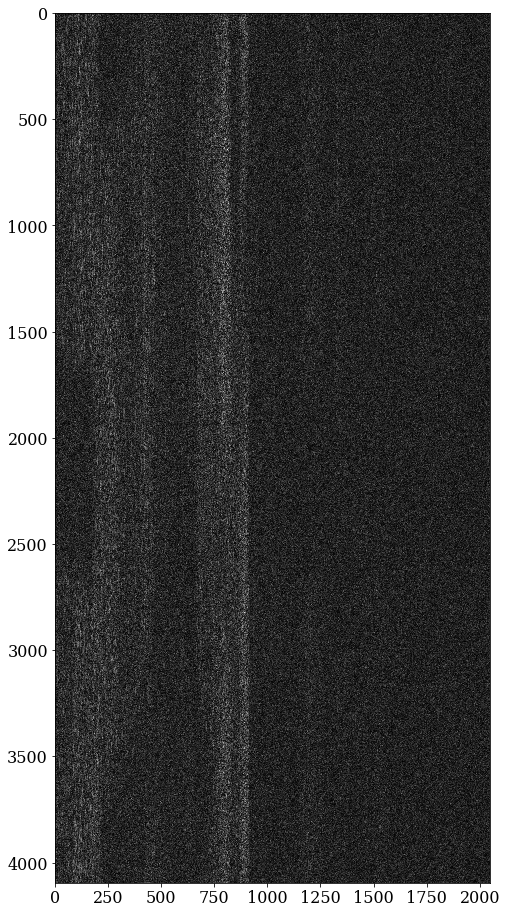

In [30]:
#Vecteur des fréquences en range : taille N_r, [-f_s/2;f_s/2]
freqs_r = (np.fft.fftfreq(N_r,d=1/f_s))

#Filtre adapté m_tilde(f) = V_e_tilde(f)
print("Comme on s'intéresse à l'intervalle de fréquence [-f_s/2;f_s/2] et que f_s=B_chirp, la fonction porte W(-B_chirp/2,B_chirp/2) devient simplement l'indicatrice et n'a donc pas besoin d'être codée.")
def matched_filter_r():
    return np.sqrt(tau/B_chirp)*np.exp(-2*1j*np.pi*(freqs_r**2)*tau/2/B_chirp)

def range_compression(image):
    m = matched_filter_r()  
    #Construction de la matrice filtre N_a*N_r
    m_bloc = np.tile(m,(N_a,1))
    C=np.fft.ifft(np.fft.fft(image,axis=1)*np.conjugate(m_bloc),axis=1)
    return C

#plt.plot(freqs_r,matched_filter_r().real,freqs_r,matched_filter_r().imag,freqs_r,np.abs(matched_filter_r()))
image_rc = range_compression(image_raw)
plot_amp(image_rc)

<span style="color:blue">Question 3b : </span> Passons à présent à la correction des migrations en distance, que nous avons vue en détail lors du cours 3. Comme discuté à cette occasion, cette correction dépend en principe du range à chaque cible (qui varie donc dans l'image) et nous négligeons cette variation. On pourra donc utiliser la valeur $R_0$ calculée à la question 2. Complétez la fonction range_migration_correction puis appliquez la à l'image ayant subi la compression de range. Affichez le résultat. 

Note : L'impact de cette étape du traitement est normalement difficile à voir simplement en regardant une image à cette échelle, en tous cas pour la configuration instrumentale qui nous intéresse dans cet exercice. En cas de difficultés avec cette fonction, vous pouvez au moins momentanément vous en passer en retournant directement l'image d'entrée. [<span style="color:blue">Question bonus </span> : la correction des migrations devient-elle plus ou moins cruciale si le radar fonctionne en bande Ku ($f_c=13.5$ GHz) plutôt que Ka ?].

Comme la correction des migrations s'écrit $\delta\tau(f_{dop}) = \frac{\lambda^2.R_0.f_{dop}^2}{4.c.v^2}$, elle est inversement proportionnelle au carré de la fréquence $f_c$ car $\lambda = \frac{c}{f_c}$. Or en bande Ku $f_c=13.5$ GHz et en bande Ka $f_c=30$ GHz donc en Ku la correction est plus importante qu'en bande Ka.

In [31]:
lamb=c/f_c

freqs_dop=(np.fft.fftfreq(N_a,d=1/PRF))
freqs_r=(np.fft.fftfreq(N_r,d=1/f_s))
delta_tau_max = lamb**2*R_0/4/c/(v**2)*(PRF/2)**2
print("Correction maximale de delta_tau(f_dop) = delta_tau(PRF/2) =",round(delta_tau_max,2),"s")
print("Nombre de pixels correspondants à la correction max n = delta_tau_max.f_s =",round(delta_tau_max*f_s,2),"pixels")
print("La correction de la migration range est assez peu visible")

def range_migration_correction(image):
    #FFT azimuth
    image_fft_az = np.fft.fft(image,axis=0)
    
    #produit de deux matrices N_a x N_r, l'une a toutes ses colonnes égales à fdop², l'autre ses lignes égales à fr.
    prod = np.transpose(np.tile(freqs_dop**2,(N_r,1)))*np.tile(freqs_r,(N_a,1))
    coeff = -2*1j*np.pi*lamb**2*R_0/4/c/(v**2)
    corr = np.exp(coeff*prod)
    
    #FFT en range pour pouvoir appliquer la correction 
    image_fft_az_corr = np.fft.fft(image_fft_az,axis=1)*corr
    
    #Retour via 2 FFT inverses
    image_invfft_az = np.fft.ifft(np.fft.ifft(image_fft_az_corr,axis=1),axis=0)
    return image_invfft_az

image_rc_rm = range_migration_correction(image_rc)
plot_amp(image_rc_rm)

Correction maximale de delta_tau(f_dop) = delta_tau(PRF/2) = -0.0 s
Nombre de pixels correspondants à la correction max n = delta_tau_max.f_s = -3.44 pixels
La correction de la migration range est assez peu visible


<span style="color:blue">Question 3c : </span> Dernière étape, la compression azimuth. En utilisant la même approche que pour la question 3a, complétez la fonction ci-dessous puis affichez le résultat.

De même que précédemment, comme PRF=B_dop, la fonction porte n'a pas besoin d'être codée


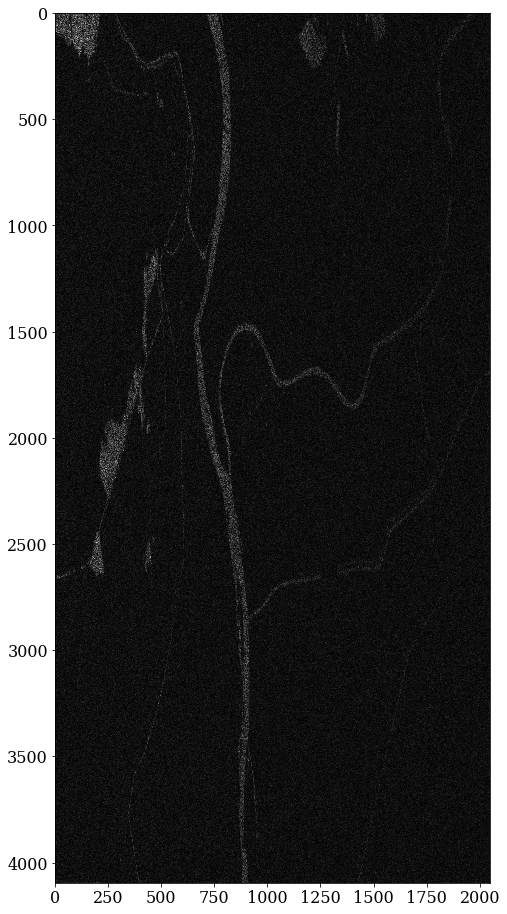

In [35]:
T_ill=lamb*r0/v/L
B_dop=2*v/L
#Vecteur de fréquences en azimuth : taille N_a, [-PRF/2;PRF/2]
freqs_az=(np.fft.fftfreq(N_a,d=1/PRF))
print("De même que précédemment, comme PRF=B_dop, la fonction porte n'a pas besoin d'être codée")
#Filtre optimal m_tilde(f)
def matched_filter_az():
    return np.sqrt(T_ill/B_dop)*np.exp(-2*1j*np.pi*(freqs_az)**2*T_ill/2/B_dop)

def azimuth_compression(image):
    m = matched_filter_az()
    #Matrice filtre N_a x N_r
    m_bloc = np.transpose(np.tile(m,(N_r,1)))
    C=np.fft.ifft(np.fft.fft(image,axis=0)*np.conjugate(m_bloc),axis=0)
    return C

image_rc_rm_ac = azimuth_compression(image_rc_rm)
plot_amp(image_rc_rm_ac)

A ce stade, vous devriez avoir une image permettant de reconnaitre le type de scène (pour la scène spécifique, c'est plus dur... cf question 6). Si c'est le cas, bravo ! A l'issue des 2h, je donnerai à tous l'image finale afin que vous puissiez, pendant la semaine restante, développer/tester vos fonctions en sachant ce qu'elles doivent donner...

<span style="color:blue">Question 4 : </span> Le traitement complet est donc l'enchainement de ces trois étapes. Pour autant, naivement composer les 3 fonctions que vous avez écrites ci-dessus est une solution pas du tout optimale en termes de temps calcul. Expliquez pourquoi, puis écrivez une fonction full_processing qui prend l'image brute en entrée et optimise le traitement. Vérifiez que cette fonction optimisée redonne bien le bon résultat en affichant l'image et en comparant avec votre résultat précédent.

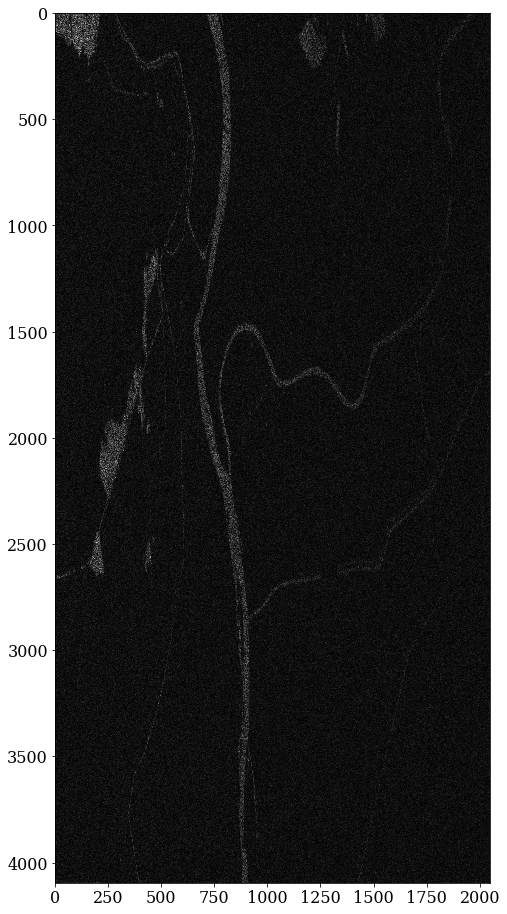

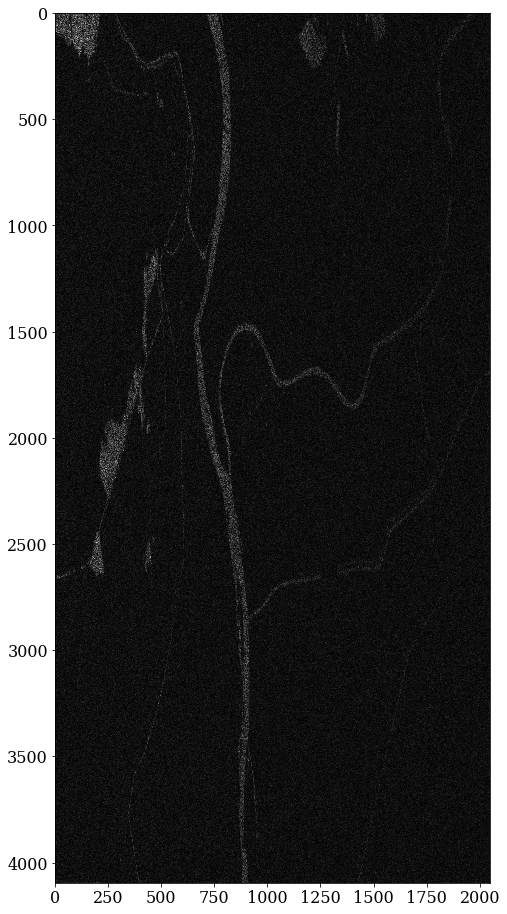

In [36]:
def full_processing(image):
    image_tfaz_tfr = np.fft.fft(np.fft.fft(image,axis=0),axis=1)
    m_az = np.conjugate(np.transpose(np.tile(matched_filter_az(),(N_r,1))))
    m_r = np.conjugate(np.tile(matched_filter_r(),(N_a,1)))
    prod = np.transpose(np.tile(freqs_dop**2,(N_r,1)))*np.tile(freqs_r,(N_a,1))
    coeff = -2*1j*np.pi*lamb**2*R_0/4/c/(v**2)
    corr = np.exp(coeff*prod)
    image_filtre = image_tfaz_tfr*m_r*corr*m_az
    image_invtf = np.fft.ifft(np.fft.ifft(image_filtre,axis=1),axis=0)
    return image_invtf

image_processed = full_processing(image_raw)
plot_amp(image_processed)
plot_amp(image_rc_rm_ac)

<span style="color:blue">Question 5 : </span> Qu'ont de spécial les dimensions 4096x2048 de l'image d'entrée ? Pourquoi ce choix à votre avis ? [Si nécessaire, essayez de retirer une ligne et une colonne à l'image brute puis refaites tourner le traitement...] Et que faire si jamais ce critère n'est pas respecté ?

En supprimant des lignes et des colonnes de l'image, il semble avoir une répétition de l'image décalée, comme un phénomène d'aliasing


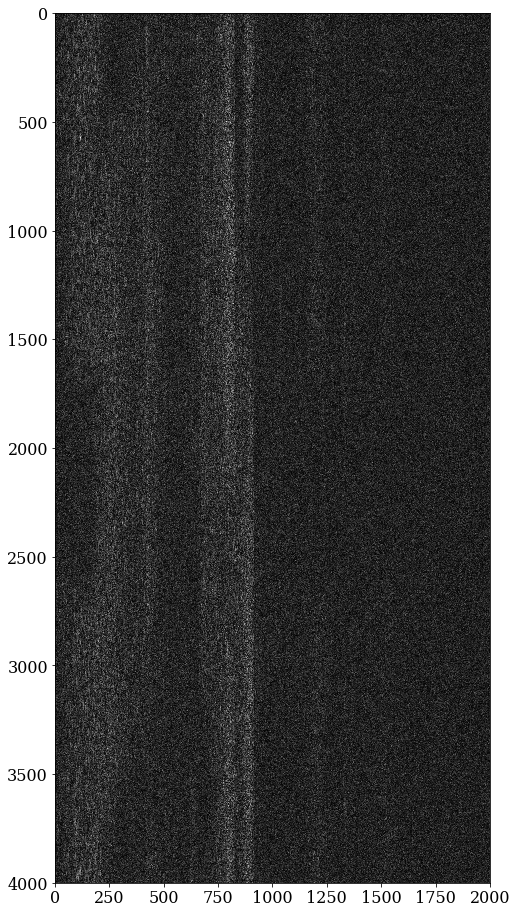

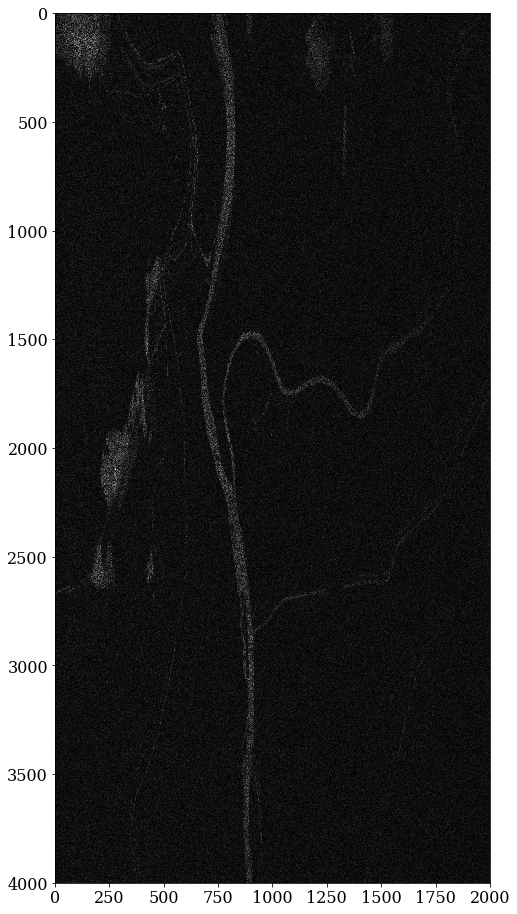

In [37]:
print("En supprimant des lignes et des colonnes de l'image, il semble avoir une répétition de l'image décalée, comme un phénomène d'aliasing")
N_a=4000
N_r=2000
freqs_r = (np.fft.fftfreq(N_r,d=1/f_s))
freqs_az=(np.fft.fftfreq(N_a,d=1/PRF))
image_tronquee=image_raw[:N_a,:N_r]
image_1=range_compression(image_tronquee)
plot_amp(image_1)
image_2=azimuth_compression(image_1)
plot_amp(image_2)


<span style="color:blue">Question 6 = Question SUPER BONUS : </span> Où a été prise cette image radar ? Le but n'est pas de reconnaitre directement à partir de l'image radar (si c'est le cas, vous êtes très très forts), mais de réussir à identifier la zone à l'aide de google maps par exemple. Je vous donne quelques indices :
* le radar avait une trajectoire (approximativement) Sud -> Nord
* il regardait sur sa gauche
* nous sommes proche de l'embouchure d'un des plus grands fleuves de France

<span style="color:red"> 3 points bonus pour le/la premier/permière qui m'enverra par mail (alejandro.bohe@cnes.fr) une capture d'écran google maps montrant la même zone et 4-5 lignes *convaincantes* justifiant qu'il s'agit bien de la bonne zone en expliquant les différences les plus flagrantes entre l'image radar et l'image optique maps . J'insiste que c'est la première réponse qui me paraitra suffisamment détaillée qui remportera les points bonus. Ce challenge s'arrête quand j'aurai ma réponse détaillée, ce qui peut bien sûr être après les 2h de BE en salle.</span>

Le fleuve concerné est le Rhône vu la trajectoire du RADAR presque parallèle au cours d'eau. Comme le satellite avait une trajectoire Sud-Nord, il faut pour repérer l'endroit sur la carte, inverser le haut et le bas. D'autre part, le satellite regardait sur sa gauche donc ce qui est le plus loin de lui en range (à droite sur l'image radar) est à l'Ouest, il faut donc aussi renverser l'image gauche-droite. Enfin on doit reproportionner l'image pour corriger les effets de l'inclinasion du satellite et l'echantillonage en range choisi : 2048 contre 4096 en azimuth. On identifie clairement en surbrillance les cours et étendues d'eau (ce qui paraît contre intuitif puisque l'eau fait office de réflécteur et apparaît sombre sur l'image radar. Ceci est peut-être du à l'interprétation informatique de l'image "cmap='gray'". En observant l'image en négatif peut-être cela est-il plus représentatif de la vraie image RADAR)(Edit : en bande KA et à faible inclinaison comme ici (rho_0 faible par rapport à R_0) l'écho de l'eau est dominant). Ainsi vu la forme du fleuve on arrive à identifier le Rhône au niveau de la ville d'Arles. On peut reconnaitre divers canaux à partir du Rhône, les marais de Beauchamp à l'Est-Sud-Est de la ville, le départ du Petit Rhône vers la gauche. Néanmoins on n'aperçoit aucun détail de zone urbaine ou de végétation, la résolution ou la fréquence utilisée ne permettant sans doute pas cette observation. A priori on est en bande Ka donc dans les petites longueurs d'onde parmi celles possibles pour le radar ce qui implique une faible pénétration. 